In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [54]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)



In [55]:
# View all of the classes that automap found

print(Base.classes.keys())

['station', 'measurement']


In [56]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.

Measurement = Base.classes.measurement
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(recent_date)


2017-08-23


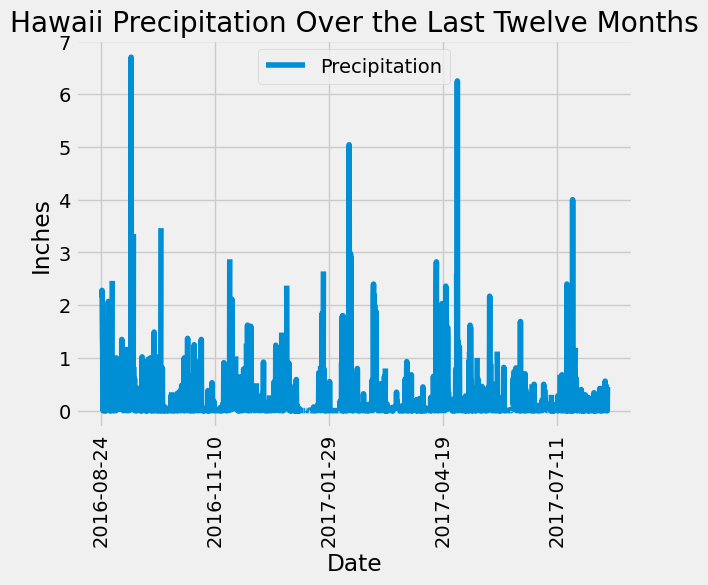

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

from datetime import datetime, timedelta

# Starting from the most recent data point in the database. 

last_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.

last_year_str = last_year.strftime ("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot (x = "Date", y = "Precipitation", 
title = "Hawaii Precipitation Over the Last Twelve Months", rot = 90)
plt.xlabel ("Date")
plt.ylabel ("Inches")
plt.show ()



In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = precip_df['Precipitation'].describe()

# Display the summary statistics as dataframe
summary_stats_df = pd.DataFrame(summary_stats)

summary_stats_df

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

station_counts = session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()

# List the stations and their counts in descending order.
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .first()[0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station_id)\
    .all()
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

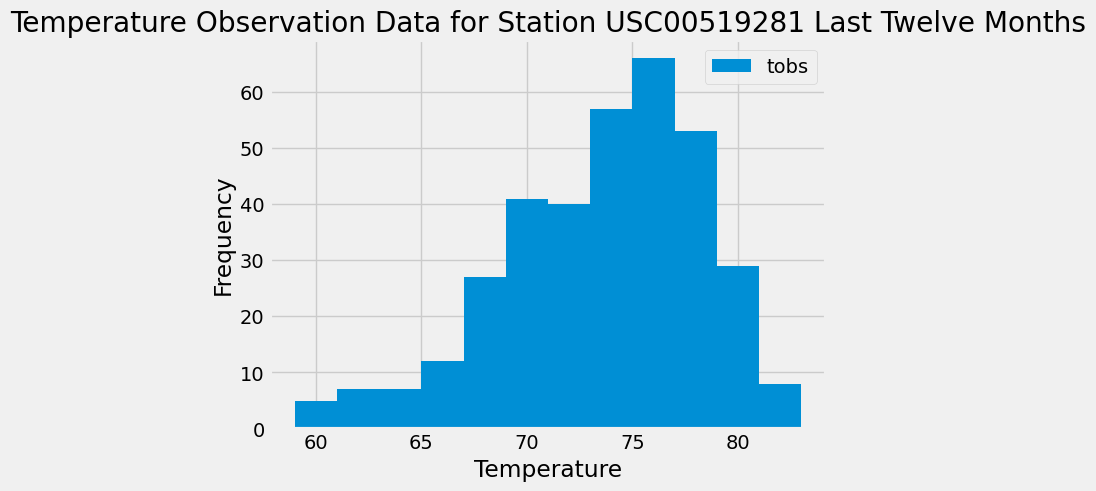

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query (Measurement.date, Measurement.tobs).filter (Measurement.station
== most_active_station, Measurement.date >= last_year_str).all ()

temperature_df = pd.DataFrame (temperature_data, columns = ["Date", "Temperature"])

plt.hist (temperature_df ["Temperature"], bins = 12, label = "tobs")
plt.xlabel ("Temperature")
plt.ylabel ("Frequency")
plt.title (f"Temperature Observation Data for Station {most_active_station} Last Twelve Months")
plt.legend ()
plt.show ()

# Close Session

In [65]:
# Close Session
session.close()